***
# 4.04 Pandas Groupby, Categorizing, and Labeling Data
- Pandas Documentation: https://pandas.pydata.org/
***
### Python 4.01. Series
### Python 4.02. Pandas DataFrame, Selection, and Indexing
### Python 4.03. Configuring Options, Data Type Conversion, Working with strings and dates, Missing Data
### Python 4.04. Groupby, Categorizing, and Labeling Data
### Python 4.05. Merging,Joining,and Concatenating
### Python 4.06. Pipe, Apply, Applymap, Map, Pivot Table, and Cotingency Table
### Python 4.07. Data Input and Output
### Python 4.08. Data Visualization
### Python 4.09. Exploratory Data Analysis and Beyond
### Python 4.10. Breakout Group Exercise and Solution
***

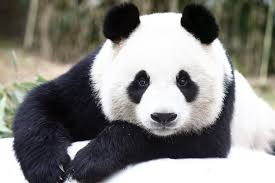

## Table of Contents - Pandas Groupby, Categorizing, and Labeling Data
### Section 1. Groupby Introduction
### Section 2. Groupby and Aggregations
### Section 3. Categorizing and Labeling Data

## Section 1. Groupby Introduction

The groupby method allows you to group rows of data together and call aggregate functions

### Using "group by" method we can:
- Split the data into groups based on some criteria
- Calculate statistics (or apply a function) to each group
- Similar to dplyr() function in R

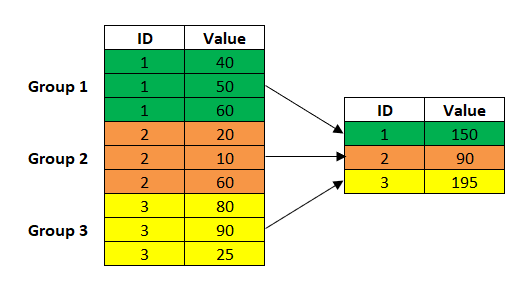

In [76]:
import pandas as pd
# Create a dictionary for dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB','FB'],
        'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah','May'],
        'Sales':[200,120,340,124,243,350,300]}

In [77]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350
6,FB,May,300


###  `.groupby()` method to group rows together based off of a column name and perform an aggregate function on them

In [78]:
# Example: Group by Company. This will create a DataFrameGroupBy object
by_comp=df.groupby('Company')

You can save this object as a new variable:

In [79]:
by_comp_mean = df.groupby(["Company"], as_index=False).mean()
by_comp_mean 

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/1337458143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_comp_mean = df.groupby(["Company"], as_index=False).mean()


,Company,Sales
0,FB,297.666667
1,GOOG,160.000000
2,MSFT,232.000000


In [80]:
by_comp_count = df.groupby(["Company"], as_index=True).count()
by_comp_count 

,Person,Sales
Company,,
FB,3,3
GOOG,2,2
MSFT,2,2


In [81]:
by_comp_count2 = df.groupby(["Company"], as_index=True).size()
by_comp_count2 

Company
FB      3
GOOG    2
MSFT    2
dtype: int64

In [82]:
type(by_comp_count), type(by_comp_count2) 

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [83]:
by_comp_count.loc['GOOG']

Person    2
Sales     2
Name: GOOG, dtype: int64

And then call aggregate methods off the object:

In [84]:
by_comp.mean()   # Pandas only calculates numeric columns

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/3224500916.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_comp.mean()   # Pandas only calculates numeric columns


,Sales
Company,
FB,297.666667
GOOG,160.000000
MSFT,232.000000


In [85]:
# Or, one step
df.groupby('Company').mean()

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/538530998.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Company').mean()


,Sales
Company,
FB,297.666667
GOOG,160.000000
MSFT,232.000000


In [86]:
df.groupby('Company').median()

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/1102529928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Company').median()


,Sales
Company,
FB,300.0
GOOG,160.0
MSFT,232.0


<AxesSubplot:xlabel='Company', ylabel='Sales'>

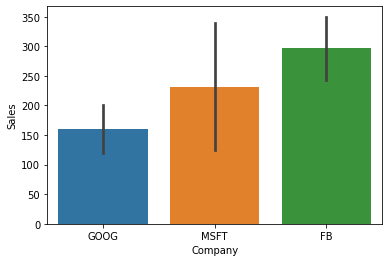

In [87]:
import seaborn as sbn
sbn.barplot(x='Company',y='Sales',data=df) # visualization of groupby

In [88]:
by_comp.std()

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/3391457442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_comp.std()


,Sales
Company,
FB,53.538148
GOOG,56.568542
MSFT,152.735065


In [89]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [90]:
by_comp.max()  # python store things in a alphabetical order

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [91]:
by_comp.count()

,Person,Sales
Company,,
FB,3,3
GOOG,2,2
MSFT,2,2


<AxesSubplot:xlabel='Company', ylabel='count'>

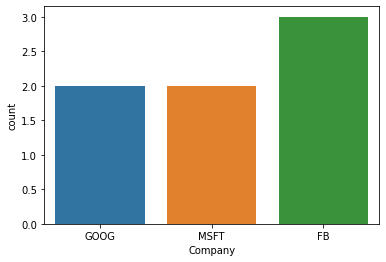

In [92]:
import seaborn as sbn
sbn.countplot(x='Company',data=df) # visualization of groupby

In [93]:
by_comp.sum().loc[['FB','MSFT','GOOG']]

C:\Users\yumei\AppData\Local\Temp/ipykernel_84612/3578541512.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_comp.sum().loc[['FB','MSFT','GOOG']]


,Sales
Company,
FB,893
MSFT,464
GOOG,320


In [94]:
by_comp.describe()

Sales                                                           
        count        mean         std    min    25%    50%    75%    max
Company                                                                 
FB        3.0  297.666667   53.538148  243.0  271.5  300.0  325.0  350.0
GOOG      2.0  160.000000   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  232.000000  152.735065  124.0  178.0  232.0  286.0  340.0

In [95]:
df.describe([0.1,0.25,0.5,0.75,0.9,0.99])

,Sales
count,7.000000
mean,239.571429
std,95.885100
min,120.000000
10%,122.400000
25%,162.000000
50%,243.000000
75%,320.000000
90%,344.000000
99%,349.400000


In [96]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350
6,FB,May,300


In [97]:
by_comp.describe()

Sales                                                           
        count        mean         std    min    25%    50%    75%    max
Company                                                                 
FB        3.0  297.666667   53.538148  243.0  271.5  300.0  325.0  350.0
GOOG      2.0  160.000000   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  232.000000  152.735065  124.0  178.0  232.0  286.0  340.0

In [98]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    3.000000    2.000000    2.000000
      mean   297.666667  160.000000  232.000000
      std     53.538148   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    271.500000  140.000000  178.000000
      50%    300.000000  160.000000  232.000000
      75%    325.000000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [99]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [100]:
by_comp.describe().loc['GOOG',]

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [101]:
df.groupby('Company').describe().transpose()[['FB','MSFT']]

Company              FB        MSFT
Sales count    3.000000    2.000000
      mean   297.666667  232.000000
      std     53.538148  152.735065
      min    243.000000  124.000000
      25%    271.500000  178.000000
      50%    300.000000  232.000000
      75%    325.000000  286.000000
      max    350.000000  340.000000

## Section 2. Groupby and Aggregations

In [102]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()
# create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
# Create a function to provide data exploratory summary
def df_summary(df,head_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    if show_info:
        display(df.info())

In [105]:
df_summary(iris_df)

(150, 5)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

In [106]:
%pwd

'C:\\Users\\yumei\\MSCA37014PythonForAnalyticsSummer2022\\Data'

In [107]:
# csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#iris = pd.read_csv('C:\\Users\\yumei\\MSCA37014PythonForAnalyticsWinter2022\\Data', header = None)
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']

# read in the dataset from the UCI Machine Learning Repository link and specify column names to use
# save as iris_df
iris =  pd.read_csv(r'C:\Users\yumei\CSP Workshop 2023\Data\iris.csv', names = col_names)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
# iris.to_excel('iris.xlsx')  # best practice: always save a copy to your local drive if possible

#### A simple groupby on one dimension with one aggregation for all varialbes

In [109]:
# can flatten hierarchical index with reset_index()
iris.groupby(['Species']).max()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


#### Multiple aggregation methods to different variables

In [110]:
df = iris.groupby(['Species']).agg(
    {'Sepal_Length':['mean','min','max'],'Sepal_Width':['count','max']}
)
df

Sepal_Length           Sepal_Width     
                        mean  min  max       count  max
Species                                                
Iris-setosa            5.006  4.3  5.8          50  4.4
Iris-versicolor        5.936  4.9  7.0          50  3.4
Iris-virginica         6.588  4.9  7.9          50  3.8

In [111]:
type(df)

pandas.core.frame.DataFrame

In [112]:
import numpy as np
df2 = iris.groupby(['Species','Sepal_Length','Species']).agg(
    Avg_Sepal_width = ('Sepal_Width',np.mean),
    Median_Sepal_width = ('Sepal_Width',np.median),
    Std_Sepal_width = ('Sepal_Width',np.std),
    Log_Sepal_width = ('Sepal_Width',np.log)
)
df2.head(10)

Avg_Sepal_width  Median_Sepal_width  \
Species     Sepal_Length Species                                            
Iris-setosa 4.3          Iris-setosa         3.000000                 3.0   
            4.4          Iris-setosa         3.033333                 3.0   
            4.5          Iris-setosa         2.300000                 2.3   
            4.6          Iris-setosa         3.325000                 3.3   
            4.7          Iris-setosa         3.200000                 3.2   
            4.8          Iris-setosa         3.180000                 3.1   
            4.9          Iris-setosa         3.075000                 3.1   
            5.0          Iris-setosa         3.362500                 3.4   
            5.1          Iris-setosa         3.600000                 3.6   
            5.2          Iris-setosa         3.666667                 3.5   

                                      Std_Sepal_width  \
Species     Sepal_Length Species                        
Iris-setosa 4.3          Iris-setosa              NaN   
            4.4          Iris-setosa         0.152753   
            4.5          Iris-setosa              NaN   
            4.6          Iris-setosa         0.221736   
            4.7          Iris-setosa         0.000000   
            4.8          Iris-setosa         0.204939   
            4.9          Iris-setosa         0.050000   
            5.0          Iris-setosa         0.192261   
            5.1          Iris-setosa         0.200000   
            5.2          Iris-setosa         0.378594   

                                                                        Log_Sepal_width  
Species     Sepal_Length Species                                                         
Iris-setosa 4.3          Iris-setosa                                           1.098612  
            4.4          Iris-setosa  [1.0647107369924282, 1.0986122886681098, 1.163...  
            4.5          Iris-setosa                                           0.832909  
            4.6          Iris-setosa  [1.1314021114911006, 1.2237754316221157, 1.280...  
            4.7          Iris-setosa           [1.1631508098056809, 1.1631508098056809]  
            4.8          Iris-setosa  [1.2237754316221157, 1.0986122886681098, 1.223...  
            4.9          Iris-setosa  [1.0986122886681098, 1.1314021114911006, 1.131...  
            5.0          Iris-setosa  [1.2809338454620642, 1.2237754316221157, 1.098...  
            5.1          Iris-setosa  [1.252762968495368, 1.252762968495368, 1.33500...  
            5.2          Iris-setosa  [1.252762968495368, 1.2237754316221157, 1.4109...

In [113]:
type(df2)

pandas.core.frame.DataFrame

#### Flattening Hierarchical Indexes
Often, you'll want to flatten hierarchical indexes for simplicity. This approach uses join to concatenate the top and bottom level of our column indexes. The resulted column name is combined with the top and bottom column names

In [114]:
df.head(20)

Sepal_Length           Sepal_Width     
                        mean  min  max       count  max
Species                                                
Iris-setosa            5.006  4.3  5.8          50  4.4
Iris-versicolor        5.936  4.9  7.0          50  3.4
Iris-virginica         6.588  4.9  7.9          50  3.8

In [115]:
df.columns.values

array([('Sepal_Length', 'mean'), ('Sepal_Length', 'min'),
       ('Sepal_Length', 'max'), ('Sepal_Width', 'count'),
       ('Sepal_Width', 'max')], dtype=object)

In [116]:
df.columns

MultiIndex([('Sepal_Length',  'mean'),
            ('Sepal_Length',   'min'),
            ('Sepal_Length',   'max'),
            ( 'Sepal_Width', 'count'),
            ( 'Sepal_Width',   'max')],
           )

In [117]:
df.columns = [''.join(col).strip() for col in df.columns.values]
df

,Sepal_Lengthmean,Sepal_Lengthmin,Sepal_Lengthmax,Sepal_Widthcount,Sepal_Widthmax
Species,,,,,
Iris-setosa,5.006,4.3,5.8,50,4.4
Iris-versicolor,5.936,4.9,7.0,50,3.4
Iris-virginica,6.588,4.9,7.9,50,3.8


#### Specify groupings prior to any aggregation

In [118]:
groupings = iris.groupby(['Species'])

In [119]:
groupings.get_group('Iris-setosa').head()  # get_group() is like where clause in sql

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
groupings.get_group('Iris-setosa').max()

Sepal_Length            5.8
Sepal_Width             4.4
Petal_Length            1.9
Petal_Width             0.6
Species         Iris-setosa
dtype: object

In [121]:
groupings.apply(lambda x: x.max())

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
Species,,,,,
Iris-setosa,5.8,4.4,1.9,0.6,Iris-setosa
Iris-versicolor,7.0,3.4,5.1,1.8,Iris-versicolor
Iris-virginica,7.9,3.8,6.9,2.5,Iris-virginica


In [122]:
groupings.filter(lambda x: x['Petal_Length'].max()<2).head() # similar as having clause in sql

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Section 3. Categorizing and Labeling Data

In [123]:
df = pd.DataFrame({'Species':['Chinook','Chum','Coho','Steelhead','Bull Trout'],
                   'Population':['Skokomish','Lower Skokomish','Skokomish','Skokomish','SF Skokomish'],
                   'Count':[1200,2400,3200,6300,8100]})
df

,Species,Population,Count
0,Chinook,Skokomish,1200
1,Chum,Lower Skokomish,2400
2,Coho,Skokomish,3200
3,Steelhead,Skokomish,6300
4,Bull Trout,SF Skokomish,8100


### pd.cut(): 
- Bin values into discrete intervals.

In [124]:
import numpy as np
bins = [0,2000,4000,6000,8000,np.inf]
labels = ['Low Return','Below Avg Return','Avg Return','Above Avg Return','High Return']

In [125]:
df['Count Category'] = pd.cut(df['Count'],bins, labels=labels)
df

,Species,Population,Count,Count Category
0,Chinook,Skokomish,1200,Low Return
1,Chum,Lower Skokomish,2400,Below Avg Return
2,Coho,Skokomish,3200,Below Avg Return
3,Steelhead,Skokomish,6300,Above Avg Return
4,Bull Trout,SF Skokomish,8100,High Return


### np.select()
Return an array drawn from elements in choicelist, depending on conditions

In [126]:
import numpy as np
import pandas as pd
# Alternatively, with np.select:

col = 'Count'
conditions = [
              df[col].between(0,2000),   # inclusive = True is the default
              df[col].between(2000,4000),  
              df[col].between(4000,6000),
              df[col].between(6000,8000),
              df[col].ge(8000)
             ]
choices = ["'0-2000'","'2000-4000'","'4000-6000'","'6000-8000'","'>8000'"]
    
df["Count Category2"] = np.select(conditions, choices, default=np.nan)
df

,Species,Population,Count,Count Category,Count Category2
0,Chinook,Skokomish,1200,Low Return,'0-2000'
1,Chum,Lower Skokomish,2400,Below Avg Return,'2000-4000'
2,Coho,Skokomish,3200,Below Avg Return,'2000-4000'
3,Steelhead,Skokomish,6300,Above Avg Return,'6000-8000'
4,Bull Trout,SF Skokomish,8100,High Return,'>8000'


### .map()

#### Map Species to Endangered Status

In [127]:
fed_status = {'Chinook':'Threatened',
              'Chum':'Not Warranted',
              'Coho':'Not Warranted',
              'Steelhead':'Threatened'}

In [128]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Count Category2,Federal Status
0,Chinook,Skokomish,1200,Low Return,'0-2000',Threatened
1,Chum,Lower Skokomish,2400,Below Avg Return,'2000-4000',Not Warranted
2,Coho,Skokomish,3200,Below Avg Return,'2000-4000',Not Warranted
3,Steelhead,Skokomish,6300,Above Avg Return,'6000-8000',Threatened
4,Bull Trout,SF Skokomish,8100,High Return,'>8000',NaN


#### Introducing the categorical data type

In [129]:
fed_status = {'Chinook':'Threatened',
              'Chum':'Not Warranted',
              'Coho':'Not Warranted',
              'Steelhead':'Threatened'}

In [130]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Count Category2,Federal Status
0,Chinook,Skokomish,1200,Low Return,'0-2000',Threatened
1,Chum,Lower Skokomish,2400,Below Avg Return,'2000-4000',Not Warranted
2,Coho,Skokomish,3200,Below Avg Return,'2000-4000',Not Warranted
3,Steelhead,Skokomish,6300,Above Avg Return,'6000-8000',Threatened
4,Bull Trout,SF Skokomish,8100,High Return,'>8000',NaN


In [131]:
df['Count Category'] = pd.Categorical(df['Count Category'],ordered = True, categories=labels)
df['Count Category']

0          Low Return
1    Below Avg Return
2    Below Avg Return
3    Above Avg Return
4         High Return
Name: Count Category, dtype: category
Categories (5, object): ['Low Return' < 'Below Avg Return' < 'Avg Return' < 'Above Avg Return' < 'High Return']

In [132]:
df.sort_values(by=['Count Category'],ascending=False)

,Species,Population,Count,Count Category,Count Category2,Federal Status
4,Bull Trout,SF Skokomish,8100,High Return,'>8000',NaN
3,Steelhead,Skokomish,6300,Above Avg Return,'6000-8000',Threatened
1,Chum,Lower Skokomish,2400,Below Avg Return,'2000-4000',Not Warranted
2,Coho,Skokomish,3200,Below Avg Return,'2000-4000',Not Warranted
0,Chinook,Skokomish,1200,Low Return,'0-2000',Threatened


#### Use get_dummies() to Convert a Categorical Variable into a Dummy Variable

In [133]:
pd.get_dummies(df['Count Category'], prefix='Count Category',drop_first = False) # perform one hot encoding

,Count Category_Low Return,Count Category_Below Avg Return,Count Category_Avg Return,Count Category_Above Avg Return,Count Category_High Return
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


#### Bin Categorical Variables

In [134]:
df2 = pd.DataFrame({"x":['a', 'b', 'c', 'a', 'b']})
df2

,x
0,a
1,b
2,c
3,a
4,b


In [135]:
value_dict = {'a':'A', 'b':'A', 'c':'B'}
df2['y'] = df2['x'].replace(value_dict)

In [136]:
df2

,x,y
0,a,A
1,b,A
2,c,B
3,a,A
4,b,A


### Example

In [137]:
import pandas as pd
# Set up a path to data folder
import os
os.chdir(r'C:\Users\yumei\CSP Workshop 2023\Data')
os.getcwd()

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

In [138]:
%pwd

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

In [139]:
# Note - # Please don't run this cell  
# this link has been removed so we will get error message if we run this cell.
df2= pd.read_csv(r"C:\Users\yumei\CSP Workshop 2023\Data\Salary_Data.csv")
df2.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [140]:
df2['YearsExperience'].value_counts(dropna=False) # keep nan

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

In [141]:
# Check a particular column type
df2['Salary'].dtype

dtype('float64')

In [142]:
# Check types for all the columns
df2.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Once groupby object is created we can calculate various statistics for each group:

In [143]:
#Calculate mean salary:
df2.groupby('YearsExperience')['Salary'].mean()

YearsExperience
1.1      39343.0
1.3      46205.0
1.5      37731.0
2.0      43525.0
2.2      39891.0
2.9      56642.0
3.0      60150.0
3.2      59445.0
3.7      57189.0
3.9      63218.0
4.0      56375.5
4.1      57081.0
4.5      61111.0
4.9      67938.0
5.1      66029.0
5.3      83088.0
5.9      81363.0
6.0      93940.0
6.8      91738.0
7.1      98273.0
7.9     101302.0
8.2     113812.0
8.7     109431.0
9.0     105582.0
9.5     116969.0
9.6     112635.0
10.3    122391.0
10.5    121872.0
Name: Salary, dtype: float64

#### Note:

- If `single brackets` are used to specify the column (e.g. salary), then the output is `Pandas Series` object. 

- If `double brackets` are used, then the output is a `DataFrame`

### Groupby Performance notes:

- no grouping/splitting occurs until it's needed. Creating the groupby object only verifies that you have passed a valid mapping

- by default the group keys are sorted during the groupby operation. You may want to pass `sort=False` for potential speedup.

In [144]:
# Calculate mean salary for each professor rank:
df2.groupby(['YearsExperience'],sort=False)[['Salary']].mean()

,Salary
YearsExperience,
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
2.9,56642.0
3.0,60150.0
3.2,59445.0
3.7,57189.0


### Data Frame: Filtering

To subset the data we can apply Boolean indexing. This indexing is commonly known as a filter.  For example if we want to subset the rows in which the salary value is greater than $120K:

In [145]:
#Calculate mean salary for each professor rank:
df_sub= df2[df2['Salary'] > 120000 ]
df_sub.head()

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [146]:
#Select only those rows that contain YearsExperience<5:
df_f= df2[df2['YearsExperience'] <= 5 ]
df_f.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data Frames: Slicing

There are a number of ways to subset the Data Frame:
- one or more columns
- one or more rows
- a subset of rows and columns

Rows and columns can be selected by their position or label

### When selecting one column, it is possible to use single set of brackets, but the resulting object will be  a Series (not a DataFrame): 

In [147]:
#Select column salary:
df2['Salary'].head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [148]:
df2[['Salary']].head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [149]:
type(df2['Salary'].head())

pandas.core.series.Series

In [150]:
type(df2[['Salary']].head())

pandas.core.frame.DataFrame

#### Note: The course materials are developed mainly based on personal experience and contributions from the Python learning community
Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney    

Copyright ©2023 Mei Najim. All rights reserved. 